##### About the code below
    this is the overall code of sentdex's 1'st tutorial
    from his pytorch series in youtube with some additional code,
    his tutorial playlist is in the link below

##### Pytorch - Deep learning w/ Python : https://www.youtube.com/playlist?list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh

## Using pytorch Neural Network module

In [1]:
import torch

##### importing the MNIST digit dataset that we will be using

In [2]:
import torchvision
from torchvision import transforms, datasets

BATCH_SIZE = 100

train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

print('number of train samples :',len(train)) # 60,000
print('number of test  samples :',len(test))  # 10,000
# the 'train' set inside contains 60,000 2d tensor of images with labels
# the 'test'  set inside contains 10,000 2d tensor of images with labels

trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
# we partioned the train & test sets into batches of 100 into the trainset & testseta.
# each iteration of the trainset, and testset when unpacked inside a for loop contains
# a tuple or a list with a length size of 2.

# let us call each 'iteration' of the trainset as 'data'

# the first index of the data == data[0] == a, contains a 100x1x28x28 tensor,
# the 100x1 part is a tensor that contains a 28x28 tensor per row
# the second index of the data == data[1] == b, constains a 100x tensor array these are the labels
# of each 100 samples

# when we pass the first index of data == data[0] == a into our network, for each iteration of trainset,
# we need to reshape it into a 100x784 tensor where 100 is the batch size,
# and 784 is the flatten 28x28 image tensor.
# we can do that using the method '.view(-1,28*28)'

number of train samples : 60000
number of test  samples : 10000
torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 784])


##### importing the neural network module of pytorch and creating our neural network model

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

nnet = NeuralNetwork()

##### training our neural network with the MNIST digit dataset

In [4]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(nnet.parameters(), lr=0.001)

import time

start = time.time()

for epoch in range(3):
    for data in trainset:
        X, y = data
        nnet.zero_grad()
        output = nnet(X.view(-1,784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
end = time.time()

print('\nThe total training time took',(end-start),'seconds')

tensor(0.3343, grad_fn=<NllLossBackward>)
tensor(0.1276, grad_fn=<NllLossBackward>)
tensor(0.0544, grad_fn=<NllLossBackward>)

The total training time took 72.91031193733215 seconds


##### testing our neural network with MNIST test and training datasets

In [5]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = nnet(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Train dataset Accuracy: ", round(correct/total, 3))

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = nnet(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Test dataset Accuracy: ", round(correct/total, 3))

Train dataset Accuracy:  0.967
Test dataset Accuracy:  0.962


##### looking at predictions

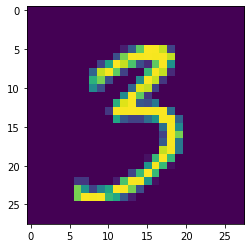

predicted output =  tensor(3)
target output    =  tensor(3)


In [6]:
index = 99

import matplotlib.pyplot as plt
plt.imshow(X[index].view(28,28))
plt.show()
print('predicted output = ',torch.argmax(nnet(X[index].view(-1,784))[0]))
print('target output    = ',y[index])